<a href="https://colab.research.google.com/github/Sandeshmore7038/Machine-Learning-Tasks-by-Webelights-Sandesh-More-/blob/main/task_1_webelight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from mlxtend.plotting import plot_confusion_matrix
from imblearn.under_sampling import NearMiss
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Load and the data
data = pd.read_csv("/content/diabetes_012_health_indicators_BRFSS2021.csv")
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

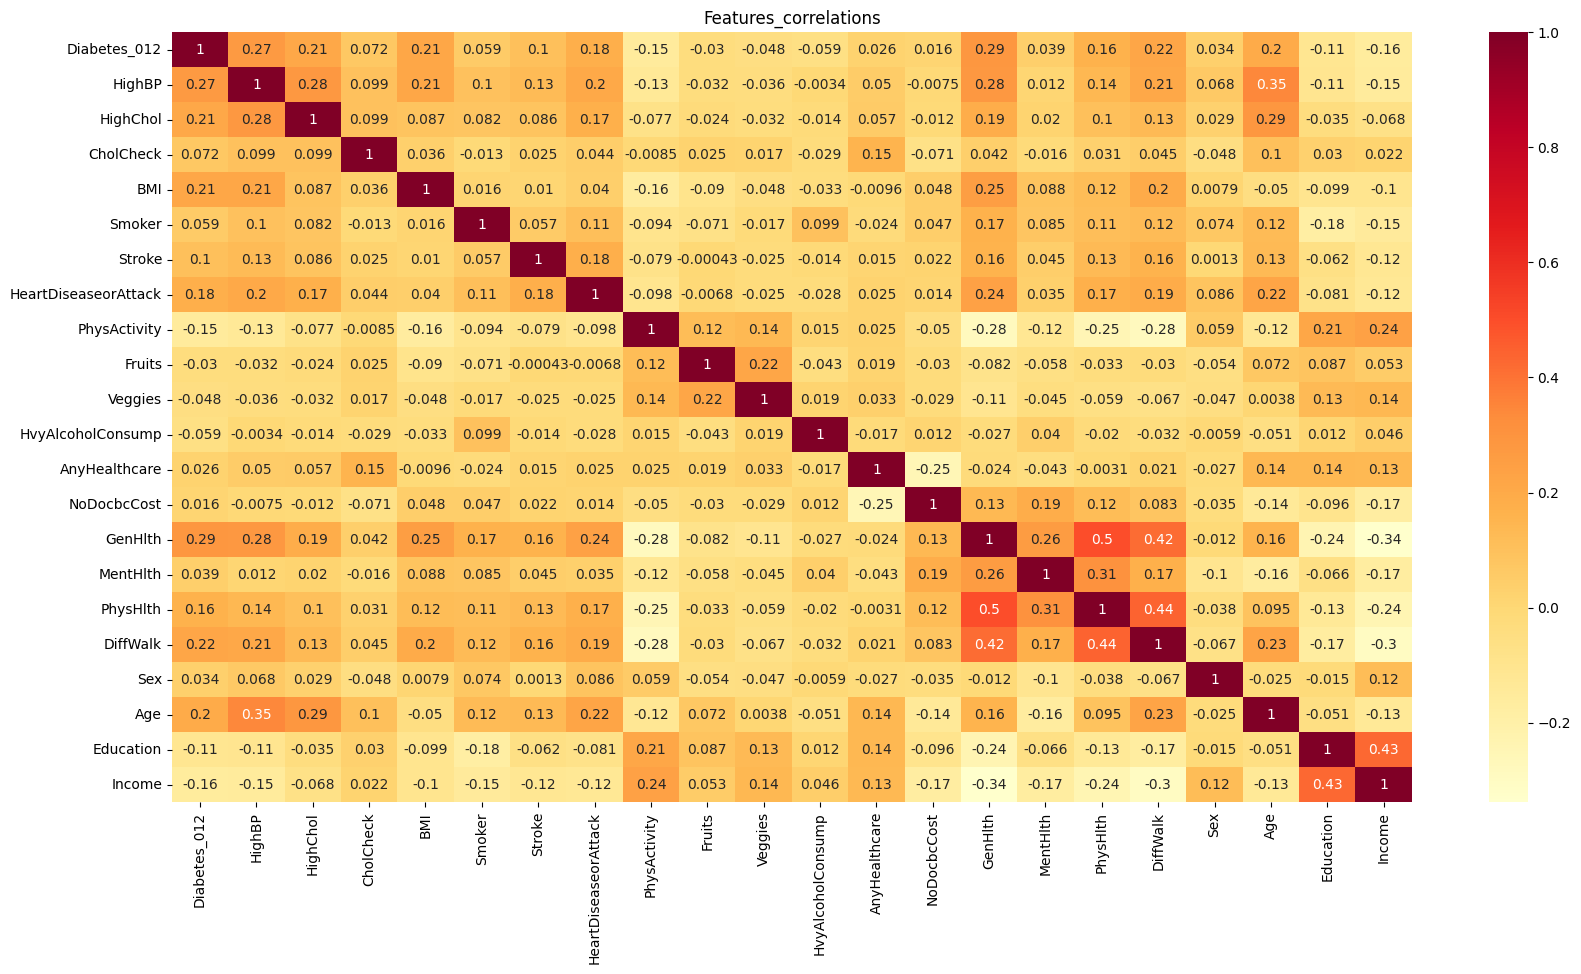

In [ ]:
# Visualize correlations
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlOrRd')
plt.title("Features_correlations")
plt.show()

In [ ]:
# Prepare features and target
features_data = data.drop("Diabetes_012", axis=1)
target_data = data["Diabetes_012"]

In [ ]:
# Handle class imbalance with NearMiss
nm = NearMiss(version=1, n_neighbors=10)
features_data, target_data = nm.fit_resample(features_data, target_data)

In [ ]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [ ]:
# Feature scaling
scaler = StandardScaler()
features_data = scaler.fit_transform(features_data)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_data, target_data, test_size=0.3, random_state=42)


In [ ]:
# Train model
model = RandomForestClassifier(max_depth=5, n_estimators=1000, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=1000)

In [ ]:
# Make predictions
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Convert to DataFrame
results = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred,
    'Predicted Probability': y_pred_prob
})

print(results.head(20))

       True Label  Predicted Label  Predicted Probability
744           0.0                0               0.111574
3205          0.0                0               0.152549
14910         2.0                0               0.222103
7103          1.0                0               0.215590
16393         2.0                0               0.235208
15474         2.0                0               0.293376
15950         2.0                0               0.196131
11147         1.0                1               0.888141
10718         1.0                0               0.244258
14601         2.0                0               0.183443
9253          1.0                1               0.941510
12665         2.0                0               0.184366
7558          1.0                0               0.460317
7255          1.0                1               0.823916
12056         2.0                0               0.242760
6879          1.0                1               0.851785
13468         

In [ ]:
# Evaluate the model
try:
    auc_score = roc_auc_score(y_test, y_pred_prob)
    print("AUC Score:", auc_score)
except ValueError as e:
    print(f"Error calculating AUC Score: {e}")

try:
    cls_report = classification_report(y_test, y_pred)
    print("Classification Report:\n", cls_report)
except ValueError as e:
    print(f"Error generating classification report: {e}")

Error calculating AUC Score: multi_class must be in ('ovo', 'ovr')
Classification Report:
               precision    recall  f1-score   support

         0.0       0.43      1.00      0.60      1697
         1.0       1.00      0.63      0.77      1720
         2.0       0.00      0.00      0.00      1641

    accuracy                           0.55      5058
   macro avg       0.48      0.54      0.46      5058
weighted avg       0.48      0.55      0.46      5058



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


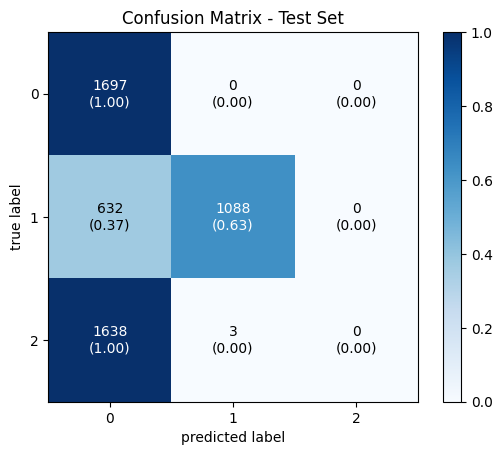

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, show_absolute=True, show_normed=True, colorbar=True)
plt.title("Confusion Matrix - Test Set")
plt.show()


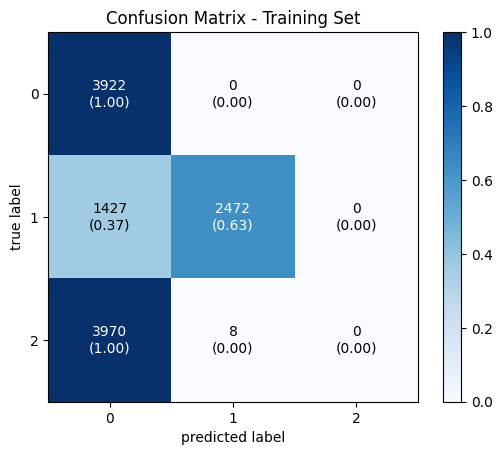

In [ ]:
# Training set performance
y_train_pred_prob = model.predict_proba(X_train)[:, 1]
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
cm_train = confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(conf_mat=cm_train, show_absolute=True, show_normed=True, colorbar=True)
plt.title("Confusion Matrix - Training Set")
plt.show()